# Project

## Part 1 - Data exploration & Preprocessing

In [2]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn import*
warnings.filterwarnings('ignore')

## Initial Data Exploration

Correlation matrix & scatter plot of entire cleaned dataset

In [3]:
filename = "Delivery_cleaned.csv"
headerNames = [
"expDOR", #Expected Date of Receipt OTD
"DOR", #Date of Receipt OTD
"PN", #Part Number OTD
"qtyDel", #Quantity Delivered OTD
"alu", #Price of Aluminium IF
"aluROC", #Rate of Change of price of Aluminium IF 
"oil", #Price of oil IF
"oilROC", #Rate of Change of price of oil IF
"cummDel", #Cummulative delivered quantity CF
"TSLD", #Time since last delivery CF
"TSLED", #Time since last expected delivery CF
"delCount", #Delivery counter CF
"noDelExp", #Number of deliveries expected that day CF
"noDelRec", #Number of deliveries received that day CF
"price", #Part price PR
"Late" #Late delivery (class)
]
data = pd.read_csv(filename, names=headerNames)

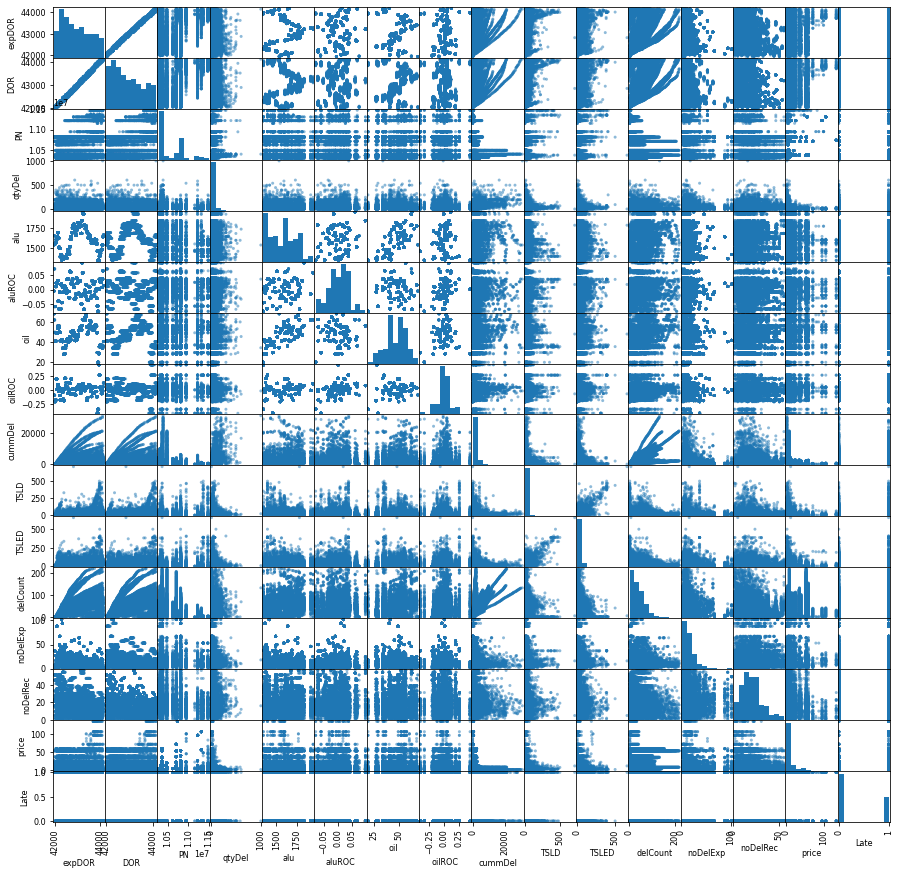

In [36]:
# Scatter Plot
plt.rc('font', size =8)
pd.plotting.scatter_matrix(data, figsize=(15,15))
plt.show()

In [37]:
# Correlation
corr = data.corr()
corr.style.background_gradient().set_precision(2)

,expDOR,DOR,PN,qtyDel,alu,aluROC,oil,oilROC,cummDel,TSLD,TSLED,delCount,noDelExp,noDelRec,price,Late
expDOR,1.00,1.00,0.37,0.06,0.27,0.02,0.17,0.02,0.30,0.29,0.26,0.45,-0.26,-0.28,0.06,-0.04
DOR,1.00,1.00,0.37,0.06,0.26,0.01,0.17,0.02,0.29,0.29,0.24,0.45,-0.25,-0.29,0.07,0.01
PN,0.37,0.37,1.00,-0.07,-0.04,-0.01,-0.03,-0.05,-0.24,0.13,0.13,-0.29,0.07,-0.14,0.12,0.18
qtyDel,0.06,0.06,-0.07,1.00,0.04,0.01,0.02,-0.01,0.48,0.02,-0.00,0.03,-0.11,0.01,-0.30,-0.03
alu,0.27,0.26,-0.04,0.04,1.00,0.16,0.73,0.13,0.18,0.03,0.02,0.32,-0.15,-0.05,-0.01,-0.04
aluROC,0.02,0.01,-0.01,0.01,0.16,1.00,-0.03,0.42,0.02,0.01,0.02,0.06,0.01,-0.05,0.01,0.01
oil,0.17,0.17,-0.03,0.02,0.73,-0.03,1.00,0.21,0.12,-0.01,-0.00,0.19,-0.09,0.01,0.00,0.00
oilROC,0.02,0.02,-0.05,-0.01,0.13,0.42,0.21,1.00,0.05,0.02,0.04,0.09,-0.04,-0.06,-0.00,-0.02
cummDel,0.30,0.29,-0.24,0.48,0.18,0.02,0.12,0.05,1.00,0.01,-0.00,0.58,-0.15,-0.07,-0.16,-0.00
TSLD,0.29,0.29,0.13,0.02,0.03,0.01,-0.01,0.02,0.01,1.00,0.67,0.00,-0.06,-0.08,-0.13,-0.02


Array conversion & normalisation

In [29]:
# Convert to array
array = data.values

# get seperated input and classifies, using a deep copy of a list
X = array[:,0:15]
Y = array[:,15]

scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)

#Convert back to Pandas
normX = pd.DataFrame(normalizedX)
Y = pd.DataFrame(Y)

# Concatinating the dataframes back together
outData = pd.concat([normX, Y], axis=1, sort=False)

# Saving the data
outData.to_csv("Delivery_cleaned_normalised.csv",header=False, index=False)

Regression feature analysis

In [38]:
test = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=4)
fit = test.fit(X, Y)
print()

# have to manually display as no function to do so available
for index, result in enumerate(fit.scores_):
    print("{0:20}".format(headerNames[index]),"{0:20}".format(round(result,2)))


expDOR                              18.55
DOR                                  0.52
PN                                 464.19
qtyDel                               9.67
alu                                 23.06
aluROC                               1.65
oil                                   0.0
oilROC                               4.04
cummDel                               0.1
TSLD                                 4.37
TSLED                              600.66
delCount                            24.89
noDelExp                           612.92
noDelRec                            99.71
price                              540.44
